> 探索特征的笔记。

In [1]:
%pylab inline
import pandas as pd
import datetime as dt
u = pd.read_csv('../data/2nd/tianchi_mobile_recommend_train_user_filtered.csv')
i = pd.read_csv('../data/2nd/tianchi_mobile_recommend_train_item.csv', index_col=['item_id'])

Populating the interactive namespace from numpy and matplotlib


# 按天行为数据分布

date,2014-11-18,2014-11-19,2014-11-20,2014-11-21,2014-11-22,2014-11-23,2014-11-24,2014-11-25,2014-11-26,2014-11-27,...,2014-12-09,2014-12-10,2014-12-11,2014-12-12,2014-12-13,2014-12-14,2014-12-15,2014-12-16,2014-12-17,2014-12-18
"(u,i) behaviors",411,387,384,318,373,369,398,430,435,478,...,425,373,361,1647,430,437,444,445,392,393
items,237,223,245,217,225,222,255,262,238,271,...,253,245,240,837,273,268,283,288,260,281
users,400,386,370,313,368,365,392,423,429,474,...,423,367,356,1582,425,432,439,438,387,390


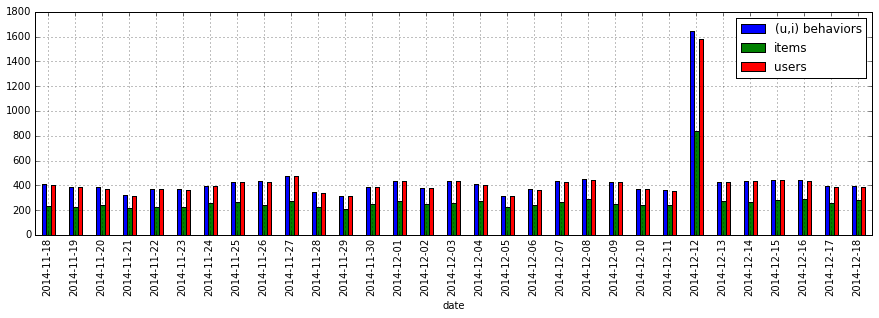

In [7]:
df = u[u.behavior_type == 4].groupby(['date'])\
.apply(lambda df: pd.Series([
            len(df[['user_id', 'item_id']].drop_duplicates()),
            len(df['user_id'].drop_duplicates()),
            len(df['item_id'].drop_duplicates())
        ], index=['(u,i) behaviors', 'items', 'users']))
df.plot(kind='bar', figsize=(15, 4));
df.T

In [10]:
u['week'] = u.date.map(lambda d: dt.datetime.strptime(d, '%Y-%m-%d').strftime('%w'))

week,0,1,2,3,4,5,6
"(u,i) pairs",61137,57175,55990,56724,53076,48089,56596
items,4617,4680,4462,4513,4429,4321,4440
users,49565,46334,45587,46476,43550,39419,46460


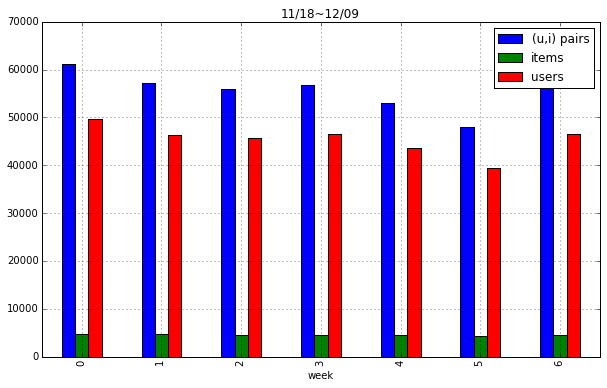

In [44]:
df = u[u.behavior_type.lt(5) & u.date.lt('2014-12-09')].groupby(['week'])\
.apply(lambda df: pd.Series([
            len(df[['user_id', 'item_id']].drop_duplicates()),
            len(df['user_id'].drop_duplicates()),
            len(df['item_id'].drop_duplicates())
        ], index=['(u,i) pairs', 'items', 'users']))
df.plot(kind='bar', figsize=(10, 6), title="11/18~12/09");
df.T

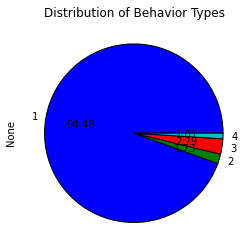

In [51]:
u[u.date.lt('2014-12-09')].groupby('behavior_type').size().plot(kind='pie',autopct='%.2f',figsize=(4, 4),title="Distribution of Behavior Types",legend=False);

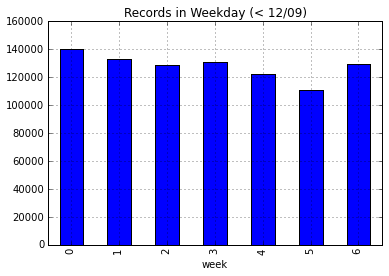

In [53]:
u[u.date.lt('2014-12-09')].groupby('week').size().plot(kind='bar', title='Records in Weekday (< 12/09)');

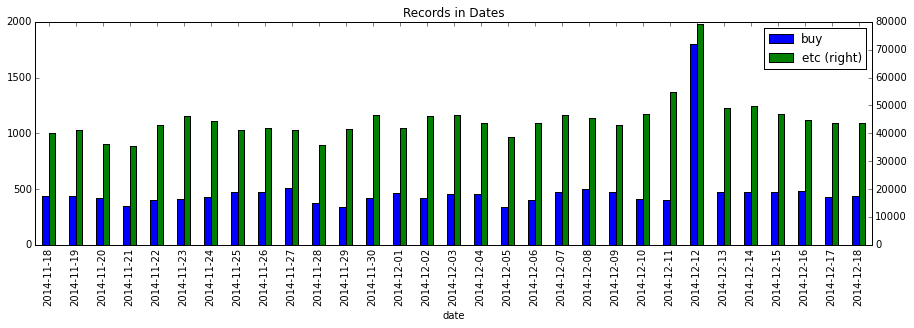

In [60]:
pd.DataFrame(dict(
    buy=u[u.behavior_type.eq(4)].groupby('date').size(),
    etc=u[u.behavior_type.ne(4)].groupby('date').size()
)).plot(kind='bar', secondary_y=['etc'], title='Records in Dates', figsize=(15,4));

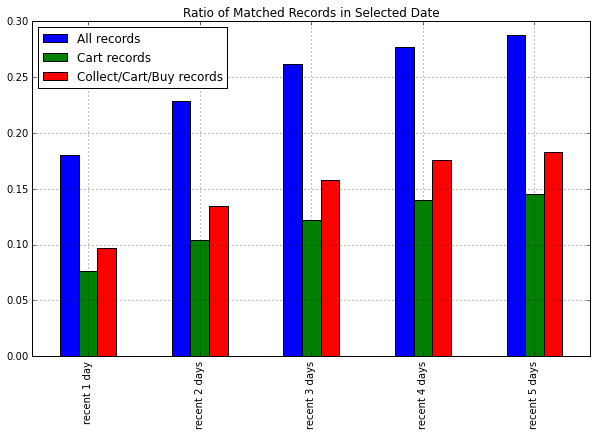

In [104]:
sel_ui = u[u.behavior_type.eq(4) & u.date.eq('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id'])
pd.DataFrame({
    'recent 1 day': [
        sum(u[u.date.ge('2014-12-17') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(sel_ui),
        sum(u[u.behavior_type.eq(3) & u.date.ge('2014-12-17') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(sel_ui),
        sum(u[u.behavior_type.ge(2) & u.date.ge('2014-12-17') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(sel_ui)
    ],
    'recent 2 days': [
        sum(u[u.date.ge('2014-12-16') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(sel_ui),
        sum(u[u.behavior_type.eq(3) & u.date.ge('2014-12-16') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(sel_ui),
        sum(u[u.behavior_type.ge(2) & u.date.ge('2014-12-16') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(sel_ui)
    ],
    'recent 3 days': [
        sum(u[u.date.ge('2014-12-15') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(sel_ui),
        sum(u[u.behavior_type.eq(3) & u.date.ge('2014-12-15') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(sel_ui),
        sum(u[u.behavior_type.ge(2) & u.date.ge('2014-12-15') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(sel_ui)
    ],
    'recent 4 days': [
        sum(u[u.date.ge('2014-12-14') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(sel_ui),
        sum(u[u.behavior_type.eq(3) & u.date.ge('2014-12-14') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(sel_ui),
        sum(u[u.behavior_type.ge(2) & u.date.ge('2014-12-14') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(sel_ui)
    ],
    'recent 5 days': [
        sum(u[u.date.ge('2014-12-13') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(sel_ui),
        sum(u[u.behavior_type.eq(3) & u.date.ge('2014-12-13') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(sel_ui),
        sum(u[u.behavior_type.ge(2) & u.date.ge('2014-12-13') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(sel_ui)
    ]
}, index=['All records', 'Cart records', 'Collect/Cart/Buy records']).T.plot(kind='bar', title='Ratio of Matched Records in Selected Date', figsize=(10,6));

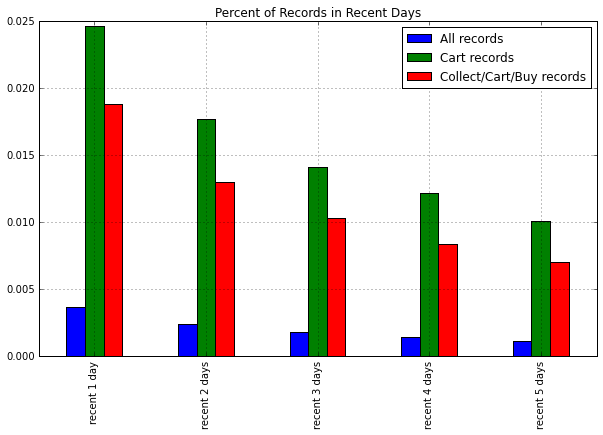

In [103]:
sel_ui = u[u.behavior_type.eq(4) & u.date.eq('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id'])
pd.DataFrame({
    'recent 1 day': [
        sum(u[u.date.ge('2014-12-17') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(u[u.date.ge('2014-12-17') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates()),
        sum(u[u.behavior_type.eq(3) & u.date.ge('2014-12-17') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(u[u.behavior_type.eq(3) & u.date.ge('2014-12-17') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates()),
        sum(u[u.behavior_type.ge(2) & u.date.ge('2014-12-17') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(u[u.behavior_type.ge(2) & u.date.ge('2014-12-17') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates())
    ],
    'recent 2 days': [
        sum(u[u.date.ge('2014-12-16') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(u[u.date.ge('2014-12-16') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates()),
        sum(u[u.behavior_type.eq(3) & u.date.ge('2014-12-16') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(u[u.behavior_type.eq(3) & u.date.ge('2014-12-16') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates()),
        sum(u[u.behavior_type.ge(2) & u.date.ge('2014-12-16') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(u[u.behavior_type.ge(2) & u.date.ge('2014-12-16') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates())
    ],
    'recent 3 days': [
        sum(u[u.date.ge('2014-12-15') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(u[u.date.ge('2014-12-15') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates()),
        sum(u[u.behavior_type.eq(3) & u.date.ge('2014-12-15') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(u[u.behavior_type.eq(3) & u.date.ge('2014-12-15') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates()),
        sum(u[u.behavior_type.ge(2) & u.date.ge('2014-12-15') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(u[u.behavior_type.ge(2) & u.date.ge('2014-12-15') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates())
    ],
    'recent 4 days': [
        sum(u[u.date.ge('2014-12-14') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(u[u.date.ge('2014-12-14') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates()),
        sum(u[u.behavior_type.eq(3) & u.date.ge('2014-12-14') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(u[u.behavior_type.eq(3) & u.date.ge('2014-12-14') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates()),
        sum(u[u.behavior_type.ge(2) & u.date.ge('2014-12-14') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(u[u.behavior_type.ge(2) & u.date.ge('2014-12-14') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates())
    ],
    'recent 5 days': [
        sum(u[u.date.ge('2014-12-13') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(u[u.date.ge('2014-12-13') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates()),
        sum(u[u.behavior_type.eq(3) & u.date.ge('2014-12-13') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(u[u.behavior_type.eq(3) & u.date.ge('2014-12-13') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates()),
        sum(u[u.behavior_type.ge(2) & u.date.ge('2014-12-13') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates().set_index(['user_id', 'item_id']).index.isin(sel_ui.index)) / len(u[u.behavior_type.ge(2) & u.date.ge('2014-12-13') & u.date.lt('2014-12-18')][['user_id', 'item_id']].drop_duplicates())
    ]
}, index=['All records', 'Cart records', 'Collect/Cart/Buy records']).T.plot(kind='bar', title='Ratio of Matched Records in Recent Days', figsize=(10,6));

# 分析个人数据

In [2]:
udf = u.set_index(['user_id', 'item_id'])

In [3]:
u17 = udf[(udf.behavior_type == 3) & (udf.date == '2014-12-17')]

In [4]:
u18 = udf[(udf.behavior_type == 4) & (udf.date == '2014-12-18')]

In [99]:
udf18 = u[(u.date < '2014-12-18') & (u.date > '2014-12-14')].set_index(['user_id', 'item_category', 'item_id'])

In [16]:
udf = u.set_index(['user_id', 'item_category', 'item_id'])

In [156]:
udf18n = udf18.reset_index()

In [150]:
def inspect_user_behavior_percentage(user_id, item_category, item_id=0):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    udf18.loc[user_id, item_category, :].sort(['date', 'hour']).reset_index().groupby('item_id').size().plot(kind='pie', ax=axes[0], autopct='%.1f')
    udf18.loc[user_id, :, :].groupby(level=0).size().plot(kind='pie', ax=axes[1], autopct='%.1f')
    return udf18[udf18.behavior_type==3].loc[user_id, :, :].sort(['date', 'hour'])

In [176]:
u18[~u18.index.isin(u17.index)]

,,behavior_type,user_geohash,item_category,hour,date
user_id,item_id,,,,,
2242451,59801863,4,NaN,3942,10,2014-12-18
77443046,237749125,4,NaN,1029,0,2014-12-18
29285910,171315964,4,NaN,3368,20,2014-12-18
86239261,29934207,4,94n6j2j,4778,17,2014-12-18
136347831,48922737,4,97kv775,5988,20,2014-12-18
99785045,272357531,4,NaN,8561,11,2014-12-18
126086100,184130877,4,NaN,9510,23,2014-12-18
23228065,221409776,4,97jbn1f,2252,17,2014-12-18
104683710,111703405,4,NaN,4778,14,2014-12-18


,,behavior_type,user_geohash,hour,date
item_category,item_id,,,,
3942,282999976,3,95qbjsb,17,2014-12-17


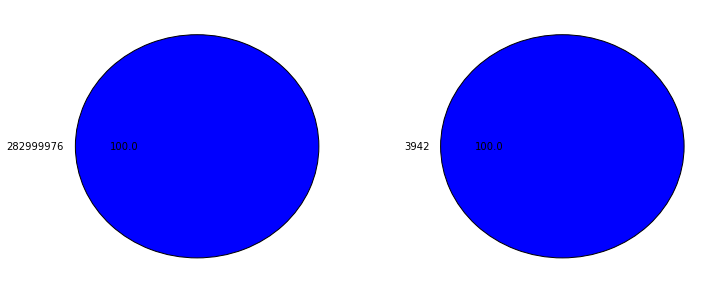

In [177]:
inspect_user_behavior_percentage(2242451, 3942, 59801863)

In [179]:
udf18n[(udf18n.item_category == 3942) & ((udf18n.item_id== 282999976) | (udf18n.item_id==59801863))].groupby('item_id').size()

item_id
59801863     8
282999976    7
dtype: int64

In [182]:
udf18n[(udf18n.item_category == 3942)].groupby('item_id').size()

item_id
1302219       1
2008995       2
2216086       2
3661086       2
4169334       2
4965059       6
5580335       5
6356207       1
7957155       2
9911235       1
10237913     12
12886509      2
13849927      1
15684362      1
15813745     16
16282025      2
16856836      3
18107712      6
19108282      1
22419248     11
26246550      1
26690110      2
28276008      1
32492620      2
35834335     13
35917236      2
36264228      7
38171796      2
38173169      5
38770686      1
             ..
364536002     2
365009814     3
365978782     2
366714787     1
367572080     1
369160490     3
371485218     6
374467373     2
374890725    12
375944970     2
376219845    14
377789749     2
380219851     2
381029427     1
382331577     2
383919580     1
384250084     4
384332103     2
384798433     1
385353005     1
386040162     1
386932195     1
388428231     2
388470592     2
388800953     1
393195634     1
396774231     3
397055863     1
399454553     8
404001148     3
dtype: int64

In [174]:
u18[u18.index.isin(u17.index)]

,,behavior_type,user_geohash,item_category,hour,date
user_id,item_id,,,,,
96985981,208715196,4,NaN,6648,21,2014-12-18
44446177,343168939,4,94fr2e9,5533,12,2014-12-18
47237907,135494766,4,NaN,11492,14,2014-12-18
89380977,154226543,4,NaN,12630,23,2014-12-18
72651215,316555195,4,9rgu1kq,11497,8,2014-12-18
100192152,207251826,4,NaN,11597,22,2014-12-18
130041655,29657299,4,NaN,198,11,2014-12-18
80519771,81363321,4,NaN,7876,9,2014-12-18
54949966,146829619,4,NaN,11406,11,2014-12-18


behavior_type user_geohash  hour        date
item_category item_id                                                
12553         84184637               3          NaN    21  2014-12-17
              207187896              3          NaN    21  2014-12-17

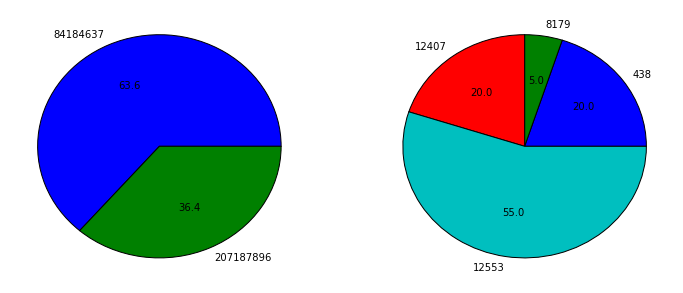

In [175]:
inspect_user_behavior_percentage(4917287, 12553, 84184637)

behavior_type user_geohash  hour        date
item_category item_id                                                
732           128875905              3      ffaeep7    18  2014-12-16
              226973341              3      ffaelmg    18  2014-12-16
12630         203996381              3      ffaelo7    18  2014-12-16
6648          23453169               3      ffaelov    18  2014-12-16
12553         212384169              3      ffaee9a    18  2014-12-16
8744          4296732                3      ffaee97    18  2014-12-16
12553         173216968              3      ffaelma    18  2014-12-16
5273          28346734               3      ffaelo5    21  2014-12-17

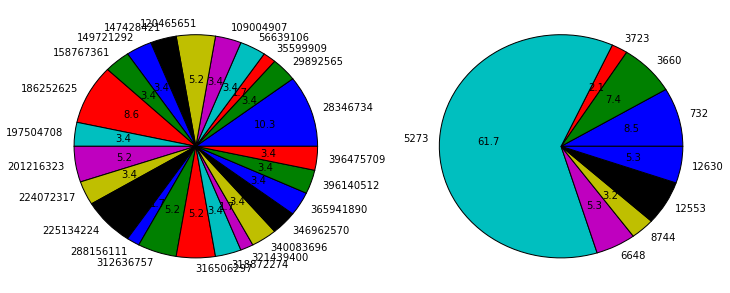

In [172]:
inspect_user_behavior_percentage(32845489, 5273, 28346734)

In [173]:
i.loc[28346734]

item_geohash      NaN
item_category    5273
Name: 28346734, dtype: object

behavior_type user_geohash  hour        date
item_category item_id                                                
4245          35090837               3          NaN    13  2014-12-16
8662          67818190               3          NaN    15  2014-12-16
4245          168474683              3          NaN    15  2014-12-16
4677          284573126              3          NaN    15  2014-12-16
              83734929               3      9rgu1hu    15  2014-12-16
5533          232877162              3          NaN    15  2014-12-16
4245          191055745              3      9rgu1h4    15  2014-12-16
11497         316555195              3          NaN     1  2014-12-17
10431         549285                 3          NaN     1  2014-12-17

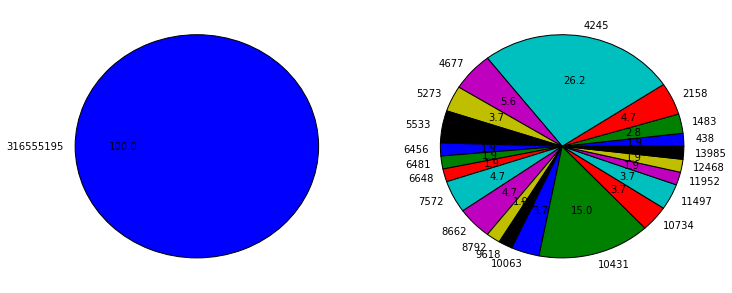

In [171]:
inspect_user_behavior_percentage(72651215, 11497, 316555195)

behavior_type user_geohash  hour        date
item_category item_id                                                
732           128875905              3      ffaeep7    18  2014-12-16
              226973341              3      ffaelmg    18  2014-12-16
12630         203996381              3      ffaelo7    18  2014-12-16
6648          23453169               3      ffaelov    18  2014-12-16
12553         212384169              3      ffaee9a    18  2014-12-16
8744          4296732                3      ffaee97    18  2014-12-16
12553         173216968              3      ffaelma    18  2014-12-16
5273          28346734               3      ffaelo5    21  2014-12-17

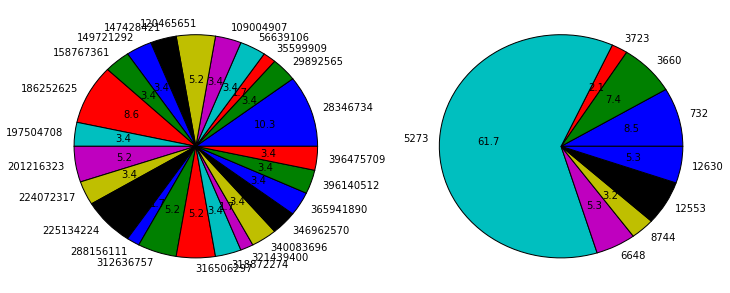

In [167]:
inspect_user_behavior_percentage(32845489, 5273, 28346734)

In [168]:
i.loc[28346734]

item_geohash      NaN
item_category    5273
Name: 28346734, dtype: object

behavior_type user_geohash  hour        date
item_category item_id                                                
9789          395124703              3      mtj1907    13  2014-12-17
8431          107216417              3      mtj0vn2    16  2014-12-17
9789          61841997               3      mtj0vaq    16  2014-12-17
              25992406               3      mtj0vn9    16  2014-12-17
              349579568              3      mtj0vko    16  2014-12-17

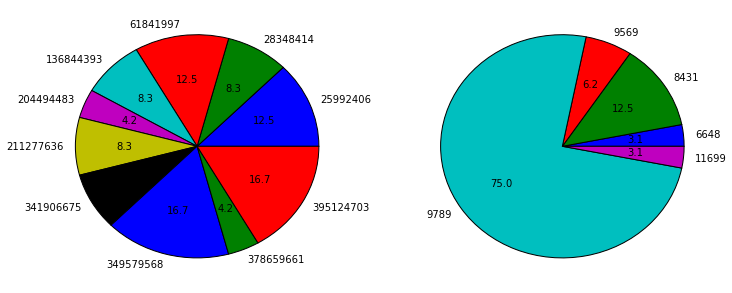

In [165]:
inspect_user_behavior_percentage(77881862, 9789, 395124703)

In [170]:
i.loc[349579568]

item_geohash      NaN
item_category    9789
Name: 349579568, dtype: object

In [166]:
udf18n[(udf18n.item_category == 9789) & ((udf18n.item_id== 349579568) | (udf18n.item_id==395124703))].groupby('item_id').size()

item_id
349579568    4
395124703    4
dtype: int64

behavior_type user_geohash  hour        date
item_category item_id                                                
3397          200566462              3          NaN     1  2014-12-15
11492         135494766              3          NaN    22  2014-12-17
              219019856              3          NaN    22  2014-12-17

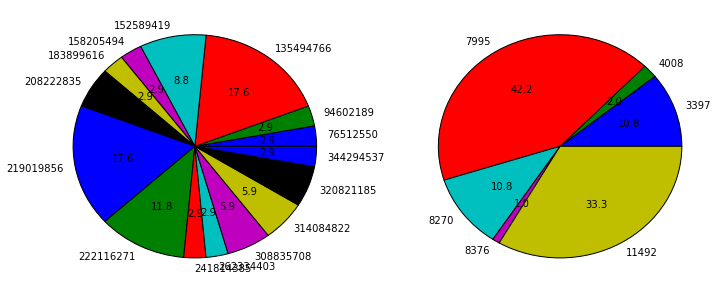

In [151]:
inspect_user_behavior_percentage(47237907, 11492, 135494766) 

In [160]:
udf18n[(udf18n.item_category == 11492) & ((udf18n.item_id== 135494766) | (udf18n.item_id==219019856))].groupby('item_id').size()

item_id
135494766    8
219019856    6
dtype: int64

,,behavior_type,user_geohash,hour,date
item_category,item_id,,,,
5533,343168939,3,NaN,20,2014-12-17


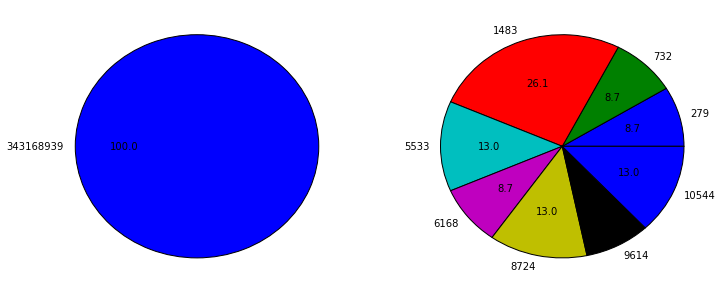

In [152]:
inspect_user_behavior_percentage(44446177, 5533, 343168939)

behavior_type user_geohash  hour        date
item_category item_id                                                
6648          182659582              3      ffolmvr    20  2014-12-17
              208715196              3      ffolm32    20  2014-12-17

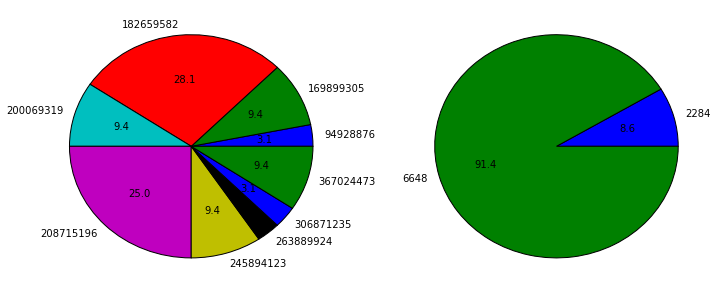

In [153]:
inspect_user_behavior_percentage(96985981, 6648, 208715196)

In [77]:
g1 = u[(u.behavior_type == 4) & (u.date == '2014-12-18')].groupby(['user_id']).item_category.nunique()
g1set = set(g1[g1>1].index)
g2 = u[(u.behavior_type == 4) & (u.date == '2014-12-17')].groupby(['user_id']).item_category.nunique()
g2set = set(g2[g2>1].index)
g1set & g2set

{36863326, 77443046, 84676338, 87942719, 116349225, 137531842}

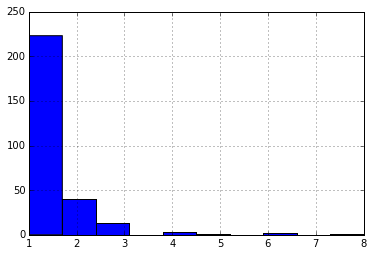

In [84]:
u[(u.behavior_type == 4) & (u.date == '2014-12-15')].groupby(['user_id']).item_category.nunique().hist()

In [46]:
d = u[(u.date < '2014-12-17') & (u.date > '2014-12-13')] # 14, 15, 16

user_last_cart_hour = d[d.behavior_type == 3].groupby('user_id').hour.last()
user_cnt = d.groupby('user_id').behavior_type.sum().reset_index()
user_cnt.columns = pd.Index(['user_id', 'user_cnt'])
user_item_cnt = d.groupby(['user_id', 'item_id']).agg(dict(behavior_type='sum', item_category='first')).reset_index()
user_item_cnt.columns = pd.Index(['user_id', 'item_id', 'item_cnt', 'item_category'])
user_category_cnt = d.groupby(['user_id', 'item_category']).behavior_type.sum().reset_index()
user_category_cnt.columns = pd.Index(['user_id', 'item_category', 'category_cnt'])

usm = pd.merge(
    user_cnt,
    pd.merge(
        user_item_cnt,
        user_category_cnt,
        on=['user_id', 'item_category'], how='left'
    ),
    on='user_id'
)
usm['category_user_pcn'] = usm['category_cnt'] / usm['user_cnt']
usm['item_category_pcn'] = usm['item_cnt'] / usm['category_cnt']

In [47]:
usm

,user_id,user_cnt,item_id,item_cnt,item_category,category_cnt,category_user_pcn,item_category_pcn
0,4913,134,12265214,5,6417,41,0.305970,0.121951
1,4913,134,13017276,3,6417,41,0.305970,0.073171
2,4913,134,28137461,2,4582,9,0.067164,0.222222
3,4913,134,49377927,4,3067,11,0.082090,0.363636
4,4913,134,53738139,5,3064,11,0.082090,0.454545
5,4913,134,66149052,3,4582,9,0.067164,0.333333
6,4913,134,68000960,3,3064,11,0.082090,0.272727
7,4913,134,70376267,3,12570,7,0.052239,0.428571
8,4913,134,73870756,1,6417,41,0.305970,0.024390
9,4913,134,76478799,2,8270,2,0.014925,1.000000
